# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Import API key
from config import weather_api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities(student).csv"


## Generate Cities List

In [3]:
# List for holding cities and countries
cities = []
countries = []

# Create a set of random lat and lng combinations
random_lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
random_lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)


# Identify nearest city for each lat, lng combination
for x in range(len(random_lats)):
    city = citipy.nearest_city(random_lats[x], random_lngs[x]).city_name
    country = citipy.nearest_city(random_lats[x], random_lngs[x]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

608
608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create a dataframe out of cities, countries, lats and lngs
weather_api_df=pd.DataFrame({
    "City":cities,
    "Cloudiness":"",
    "Country":countries,
    "Latitude":"",
    "Longitude":"",
    "Humidity":"",
    "Max Temp":"",
    "Wind Speed":""
})

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Perform a weather check on each city using a series of successive API calls.
for index,row in weather_api_df.iterrows():
    response = requests.get(query_url + weather_api_df.loc[index,'City']).json()
    try:
        print(f"Processing Record {index} for city {weather_api_df.loc[index,'City']}")
        weather_api_df.loc[index, "Latitude"]=response['coord']['lat']
        weather_api_df.loc[index, "Longitude"]=response['coord']['lon']
        weather_api_df.loc[index, "Cloudiness"]=response['clouds']['all']
        weather_api_df.loc[index, "Humidity"]=response['main']['humidity']
        weather_api_df.loc[index, "Max Temp"]=response['main']['temp_max']
        weather_api_df.loc[index, "Wind Speed"]=response['wind']['speed']
    
    except:
        print("data not found")

weather_api_df

rd 126 for city vestbygda
data not found
Processing Record 127 for city evensk
Processing Record 128 for city rancho palos verdes
Processing Record 129 for city airai
Processing Record 130 for city kabare
Processing Record 131 for city bengkulu
Processing Record 132 for city tuatapere
Processing Record 133 for city port hedland
Processing Record 134 for city makakilo city
Processing Record 135 for city aksu
Processing Record 136 for city ribeira grande
Processing Record 137 for city grand centre
data not found
Processing Record 138 for city poim
Processing Record 139 for city cherskiy
Processing Record 140 for city marsh harbour
Processing Record 141 for city kampot
Processing Record 142 for city boende
Processing Record 143 for city taoudenni
Processing Record 144 for city sinegorye
Processing Record 145 for city severo-kurilsk
Processing Record 146 for city chumikan
Processing Record 147 for city paso de los toros
Processing Record 148 for city biloela
Processing Record 149 for city 

,City,Cloudiness,Country,Latitude,Longitude,Humidity,Max Temp,Wind Speed
0,majene,100,ID,-3.5403,118.971,91,24.59,3.39
1,brae,100,GB,60.3964,-1.353,85,11.95,5.66
2,esperance,100,AU,-33.8667,121.9,68,13.42,4.93
3,yellowknife,60,CA,62.456,-114.353,93,16.85,3.58
4,thompson,18,CA,55.7435,-97.8558,97,15.94,2.15
...,...,...,...,...,...,...,...,...
603,gallup,100,US,35.5281,-108.743,73,21.42,0.45
604,egvekinot,100,RU,66.3167,-179.167,86,5.06,4.34
605,halifax,100,CA,44.6453,-63.5724,94,19.67,0.45
606,miraflores,99,CO,19.2167,-98.8083,92,16.13,0.46


In [5]:
#clean up the dataframe to exclude cities that were not found in the database
clean_weather_df=weather_api_df.loc[weather_api_df["Latitude"]!=""]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
convert_dict={"Cloudiness":float,"Latitude":float,"Longitude":float,"Humidity":float,"Max Temp":float,"Wind Speed":float}
clean_weather_df=clean_weather_df.astype(convert_dict)
clean_weather_df.to_csv(output_data_file)

In [8]:
clean_weather_df.describe()

,Cloudiness,Latitude,Longitude,Humidity,Max Temp,Wind Speed
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,52.216846,18.824330,17.930602,68.759857,20.986201,3.707366
std,41.401627,33.350994,91.479271,21.587442,8.274868,2.647856
min,0.000000,-54.800000,-179.166700,9.000000,2.010000,0.000000
25%,5.000000,-9.344050,-63.116425,56.000000,14.490000,1.652500
50%,56.500000,21.062900,21.696750,73.000000,22.400000,3.095000
75%,98.000000,47.410925,97.611125,86.000000,26.892500,5.185000
max,100.000000,78.218600,179.316700,100.000000,44.710000,14.720000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [32]:
#steps have been skipped as there are no cities with humidity greater than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

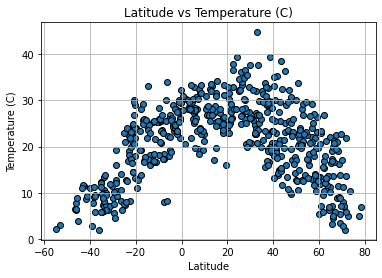

In [9]:
plt.scatter(x=clean_weather_df["Latitude"], y=clean_weather_df["Max Temp"],edgecolors="black")
plt.title("Latitude vs Temperature (C)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
plt.show
plt.savefig("../output_data/Lat_vs_Temp_fig")

The above code is used to generate a scatterplot to analyse a relationship between Latitude and Temperature (C)

## Latitude vs. Humidity Plot

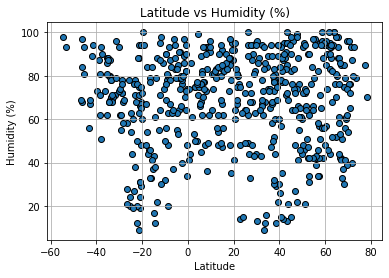

In [10]:
plt.scatter(x=clean_weather_df["Latitude"], y=clean_weather_df["Humidity"], edgecolors="black")
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show
plt.savefig("../output_data/Lat_vs_Humid_fig")

The above code is used to generate a scatterplot to analyse a relationship between Latitude and Humidity (%)

## Latitude vs. Cloudiness Plot

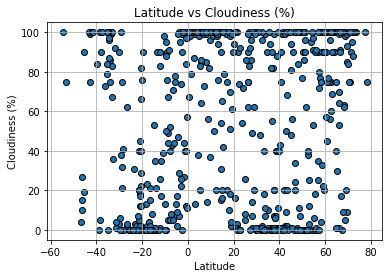

In [11]:
plt.scatter(x=clean_weather_df["Latitude"], y=clean_weather_df["Cloudiness"], edgecolors="black")
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show
plt.savefig("../output_data/Lat_vs_Cloud_fig")

The above code is used to generate a scatterplot to analyse a relationship between Latitude and Cloudiness (%)

## Latitude vs. Wind Speed Plot

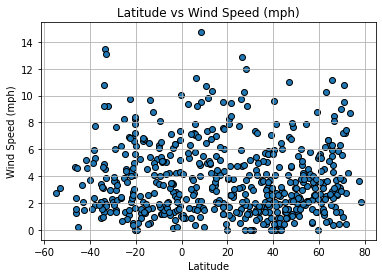

In [12]:
plt.scatter(x=clean_weather_df["Latitude"], y=clean_weather_df["Wind Speed"], edgecolors="black")
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show
plt.savefig("../output_data/Lat_vs_Wind_fig")

The above code is used to generate a scatterplot to analyse a relationship between Latitude and Wind Speed (mph)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
#create a dataframe for northern hemisphere
north_df=clean_weather_df.loc[clean_weather_df["Latitude"]>=0]

The r-squared is: 0.40404754157714806
The correlation coefficient is: -0.6356473405727016


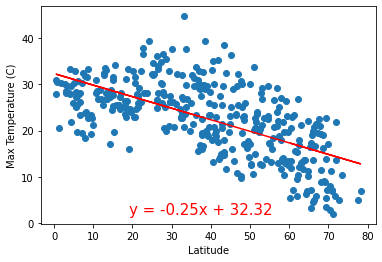

In [14]:
x_axis=north_df["Latitude"]
y_axis=north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,2),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
south_df=clean_weather_df.loc[clean_weather_df["Latitude"]<0]

The r-squared is: 0.6166466739379968
The correlation coefficient is: 0.7852685361951011


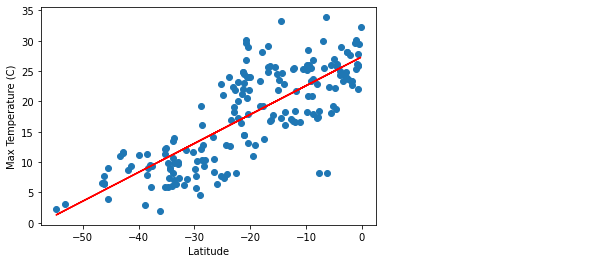

In [16]:
x_axis=south_df["Latitude"]
y_axis=south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,2),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

Based on the above pair of scatterplot & regression analysis, it appears that there is a moderate to strong correlation between Latitude and Max Temperature.
It appears that Max temperature on areas in the northern hemisphere has a negative correlation towards latitude whilst in southern hemisphere, this relationship has been reversed with a positive correlation

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0011817813452045488
The correlation coefficient is: -0.03437704677840359


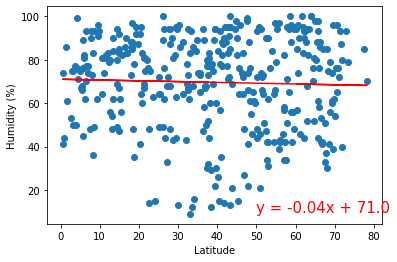

In [24]:
x_axis=north_df["Latitude"]
y_axis=north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005274764948918336
The correlation coefficient is: -0.07262757705526418


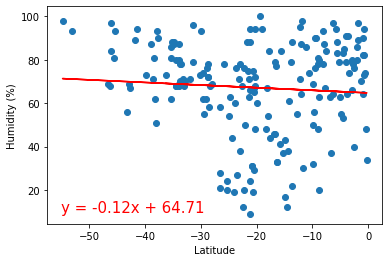

In [26]:
x_axis=south_df["Latitude"]
y_axis=south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

Based on the above analysis on Humidity(%) vs Latitude, there are no correlation between latitude and humidity (%) demonstrated. Having said that, it is possible that humidity has a stronger correlation against longitude (unfortunately scatter graph against longitude is not included in the instructions)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007304077382781636
The correlation coefficient is: -0.02702605665423951


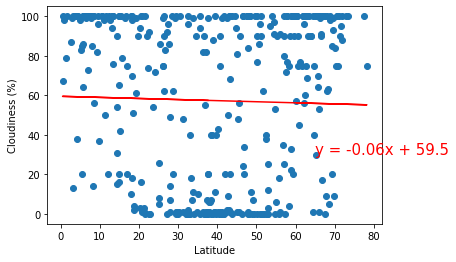

In [19]:
x_axis=north_df["Latitude"]
y_axis=north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(65,30),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013440044637031962
The correlation coefficient is: -0.11593120648484584


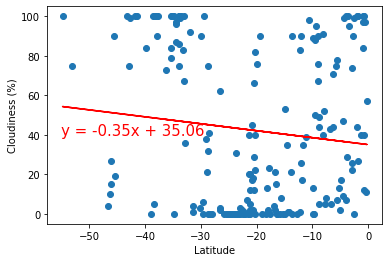

In [27]:
x_axis=south_df["Latitude"]
y_axis=south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

Based on the above analysis on Cloudiness(%) vs Latitude, there are no correlation between latitude and cloudiness (%) demonstrated. Cloudiness may have some form of correlation against other factors such as humidity, wind speed, etc which are not assessed in this assignments.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007523258067174568
The correlation coefficient is: -0.08673671694948205


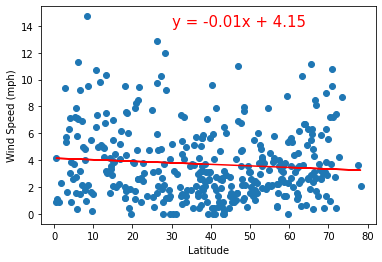

In [28]:
x_axis=north_df["Latitude"]
y_axis=north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(30,14),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00010077566857345358
The correlation coefficient is: -0.010038708511230595


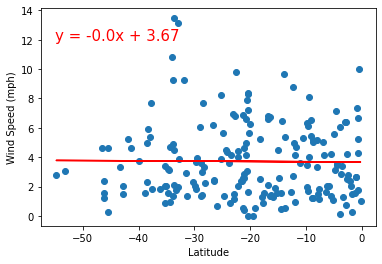

In [30]:
x_axis=south_df["Latitude"]
y_axis=south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")

Again, based on the above analysis on Wind Speed (mph) vs Latitude, there are no correlation between the two variables demonstrated.